In [17]:
# Part 1
titanicdf = read.csv('titanic.csv', header=TRUE, sep=',', fileEncoding="latin1")
mlydf = read.csv('mly532.csv', skip=19, header=TRUE, sep=',', fileEncoding="latin1")

library(dplyr)
library(plyr)
library(ggplot2)
# install.packages("ggpubr")
library(ggpubr)

In [2]:
# Qualitative: Age, SibSp, Parch, Fare
# Nominal: Name, Sex, Ticket, Cabin, Embarked
# Ordinal: Pclass 

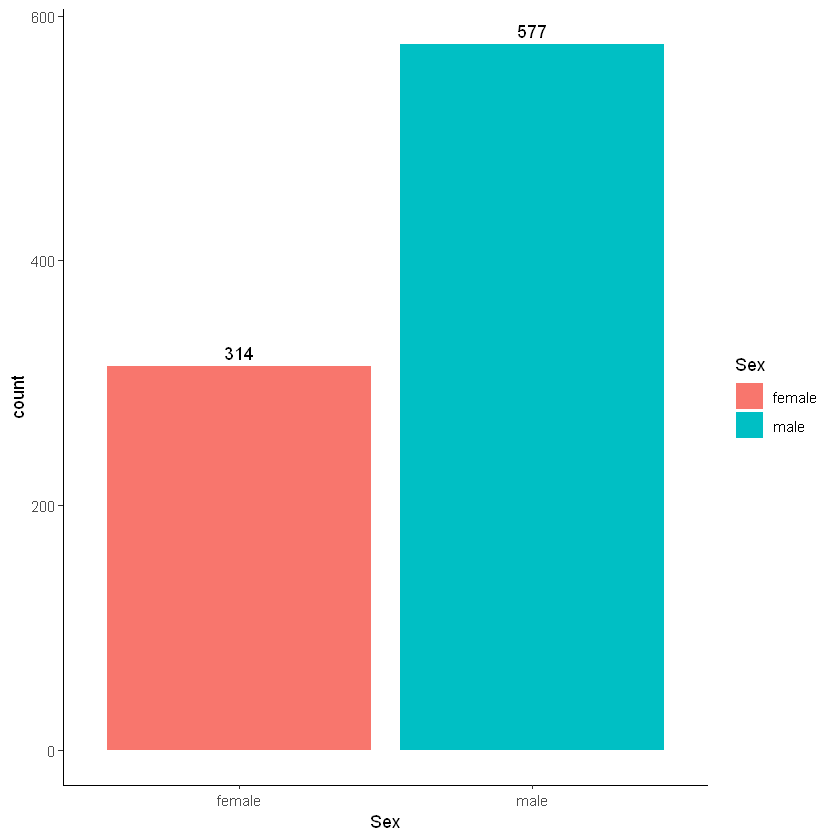

In [3]:
# Part 1
# Graph a)
ggplot(titanicdf, aes(x = Sex, fill=Sex)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), vjust=-0.5)+
 theme_classic()

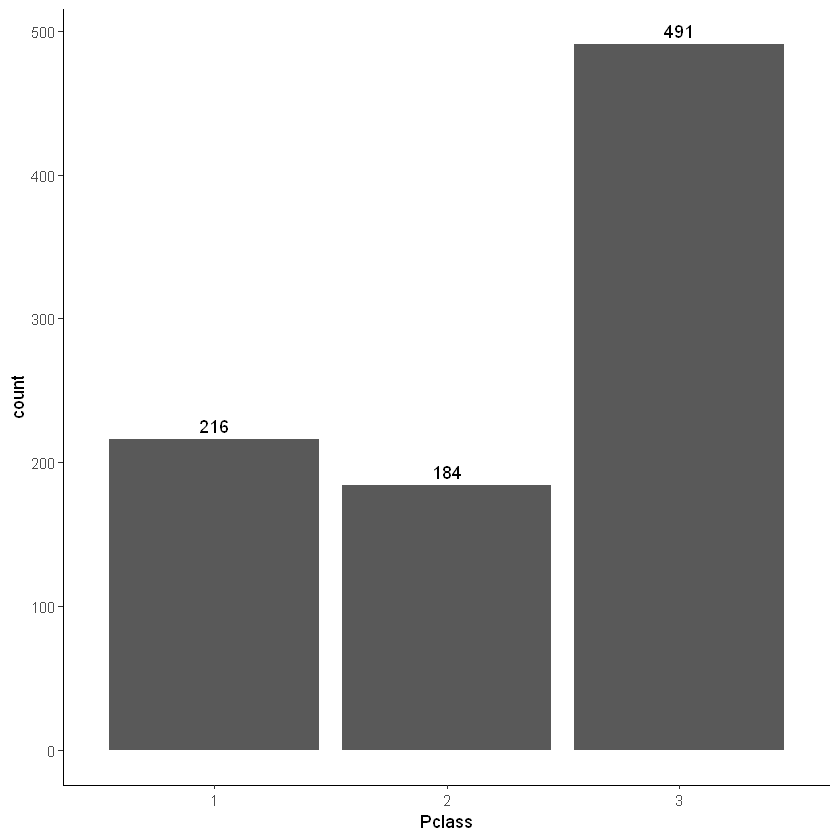

In [4]:
# Part b)
ggplot(titanicdf, aes(x = Pclass, fill=Pclass)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

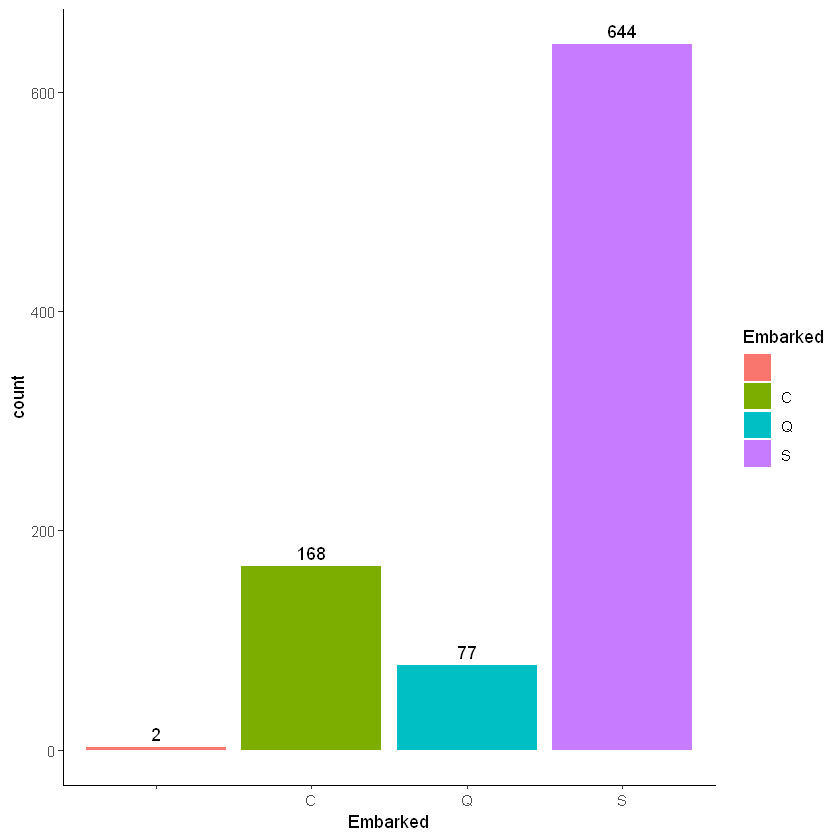

In [5]:
# Graph c)
ggplot(titanicdf, aes(x = Embarked, fill=Embarked)) +
 geom_bar(position = position_dodge()) +
 geom_text(stat='count', 
           aes(label=stat(count)), 
           position = position_dodge(width=1), 
           vjust=-0.5)+
 theme_classic()

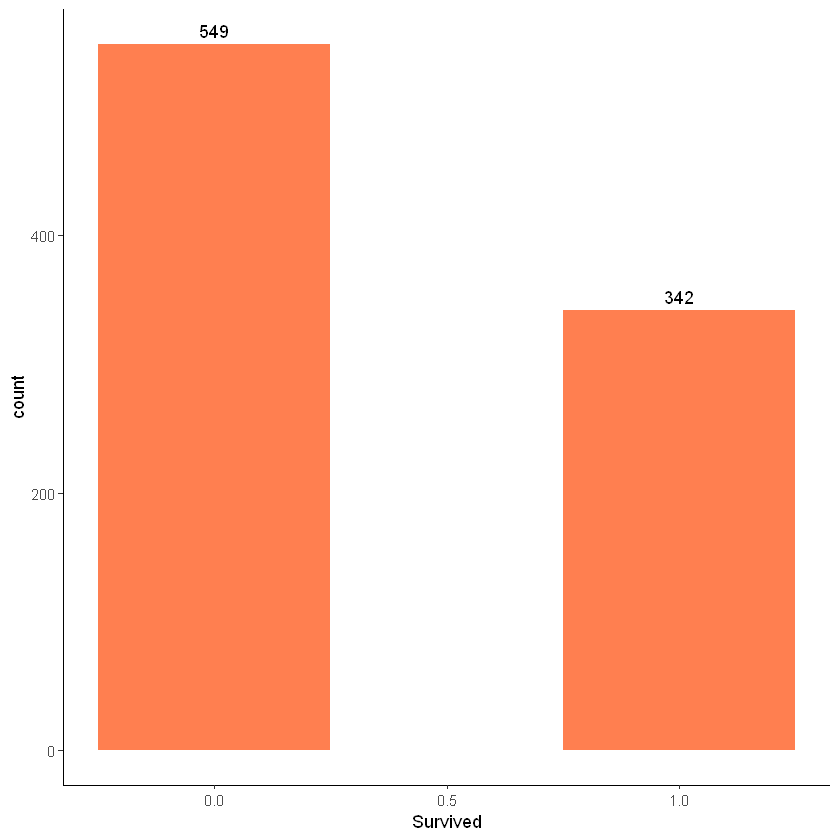

In [6]:
# Graph d)
ggplot(titanicdf, aes(x = Survived)) +
  geom_bar(width=0.5, fill = "coral") +
  geom_text(stat='count', aes(label=stat(count)), vjust=-0.5) +
  theme_classic()

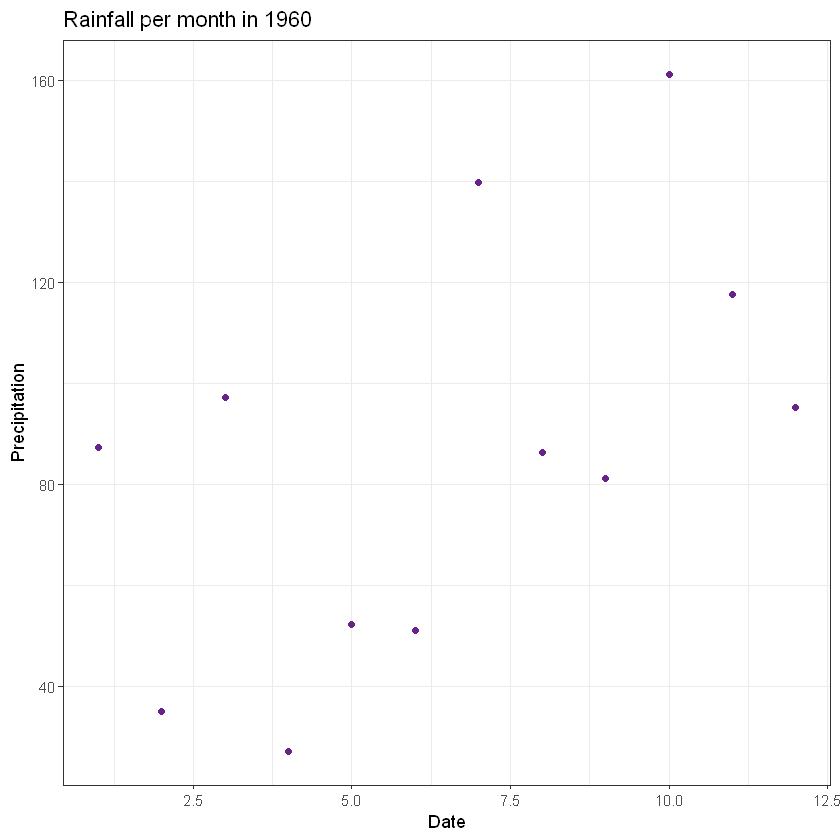

In [8]:
# Part 2)
# Graph a)
rain1960 <- mlydf[mlydf$year == 1960, ]
ggplot(data=rain1960, aes(x = month, y = rain)) +
      geom_point(color = "darkorchid4") +
      labs(title = "Rainfall per month in 1960",
           x = "Date",
           y = "Precipitation") + theme_bw(base_size = 11)

Warning message in mlydf$year == 1960:1969:
"longer object length is not a multiple of shorter object length"


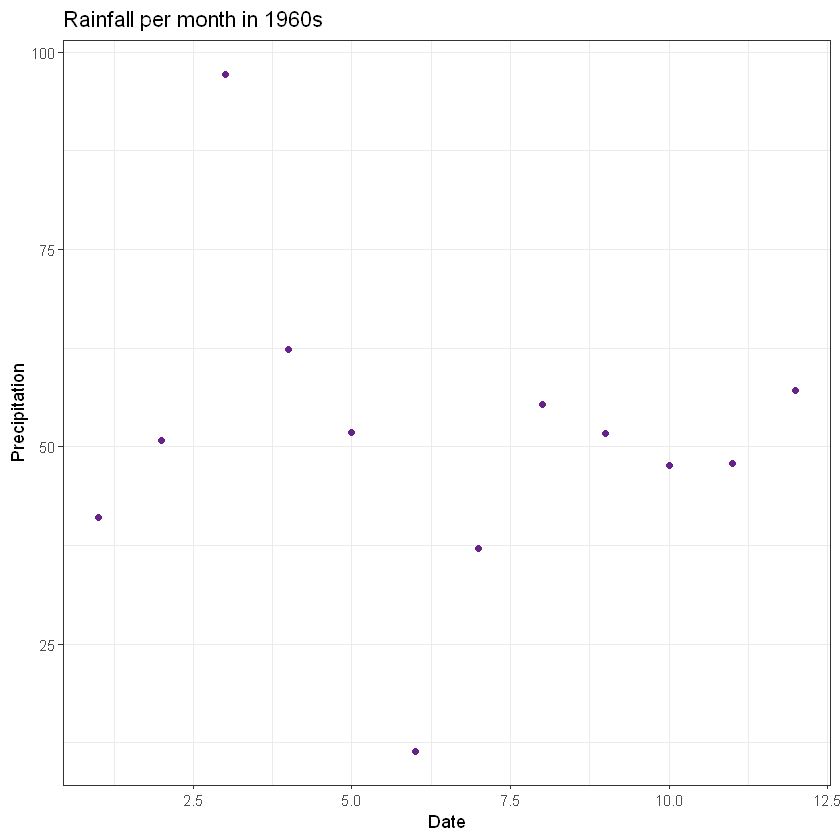

In [9]:
# Graph b)
years <- subset(mlydf, year >= 1960 & year < 1970)

rain1960 <- mlydf[mlydf$year == 1960:1969, ]
ggplot(data=rain1960, aes(x = month, y = rain)) +
      geom_point(color = "darkorchid4") +
      labs(title = "Rainfall per month in 1960s",
           x = "Date",
           y = "Precipitation") + theme_bw(base_size = 11)

In [20]:
# Part 3
titanicdf$fare_cat = cut(titanicdf$Fare, c(0,10,20,30,40,50,60,70,80,100))
titanicdf$Pclass = factor(titanicdf$Pclass, order=TRUE, levels = c(3, 2, 1))

# Graph a)
sex_graph <- ggplot(titanicdf, aes(x = Survived, fill=Sex)) +
             geom_bar(position = position_dodge()) +
             geom_text(stat='count', 
                       aes(label=stat(count)), 
                       position = position_dodge(width=1), vjust=-0.5)+
             theme_classic()

fare_graph <- ggplot(titanicdf, aes(x = Survived, fill=fare_cat)) +
              geom_bar(position = position_dodge()) +
              geom_text(stat='count', aes(label=stat(count)), position = position_dodge(width=1), vjust=-0.5)+
              theme_classic()

class_graph <-   ggplot(titanicdf, aes(x = Survived, fill=Pclass)) +
                 geom_bar(position = position_dodge()) +
                 geom_text(stat='count', 
                           aes(label=stat(count)), 
                           position = position_dodge(width=1), 
                           vjust=-0.5)+
                 theme_classic()

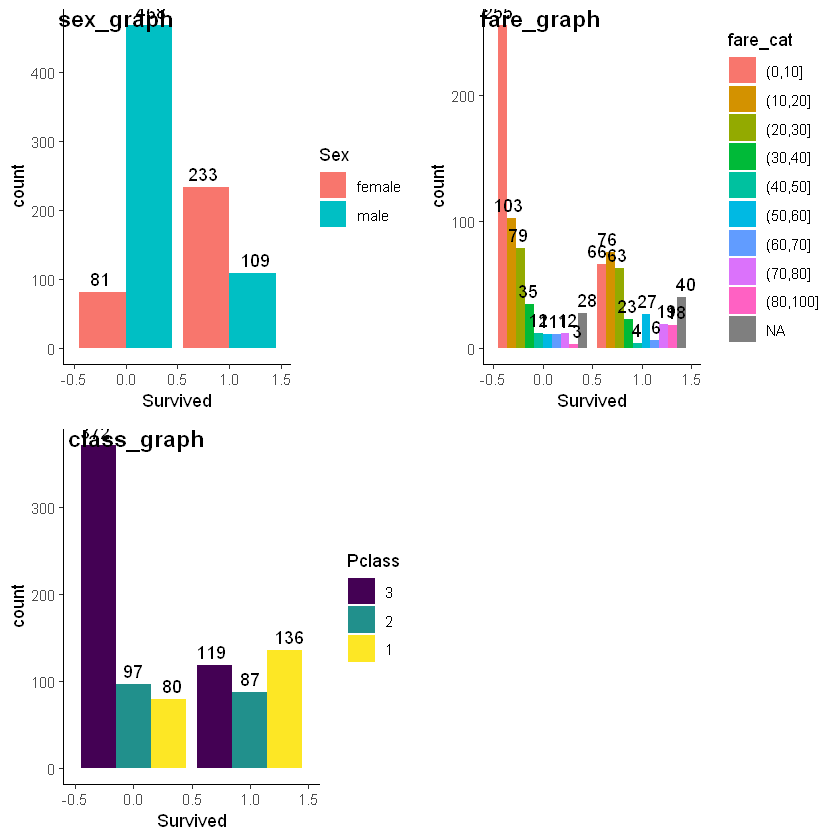

In [21]:
figure <- ggarrange(sex_graph, fare_graph, class_graph,
                    labels = c("sex_graph", "fare_graph", "class_graph"),
                    ncol = 2, nrow = 2)
figure

In [ ]:
# Graphs are too cluttered
# Clutter means the viewer will need to use more brain power to see them
# More effort means its more difficult to get a sense at what the graph is trying to say
# More effort also means that most people will give up and not even try to see what the message is
# The use of colour makes the graph more disorientating
# the colour should be uniform across the different graphs
# for example, blue for the ppl who survived and red for those who didn't
# the x-axis labels are not clear
# the survival variable is either a 1 or a 0, yet the x-axis increments in 0.5s